In [42]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re
import seaborn as sns


font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df1=pd.read_csv("./output/project/왓챠.csv")
df2=pd.read_csv("./output/project/왓챠추천_세부장르.csv")

In [43]:
df1

,Unnamed: 0,왓챠추천,왓챠추천장르
0,0,귀멸의 칼날,애니메이션
1,1,귀멸의 칼날: 무한열차편,애니메이션
2,2,극장판 귀멸의 칼날: 무한열차편,애니메이션
3,3,베놈,액션
4,4,007 카지노 로얄,액션
...,...,...,...
296,296,NaN,드라마
297,297,NaN,로맨스
298,298,NaN,예능
299,299,NaN,로맨스


In [44]:
watchaDGR=df2

In [45]:
watchaGR=df1.loc[:,["왓챠추천장르"]]
watchaGR

,왓챠추천장르
0,애니메이션
1,애니메이션
2,애니메이션
3,액션
4,액션
...,...
296,드라마
297,로맨스
298,예능
299,로맨스


In [46]:
#movie=df_movie.apply(pd.value_counts)
watchaGR=watchaGR.apply(pd.value_counts)

,왓챠추천장르
드라마,75
애니메이션,47
액션,28
코미디,27
로맨스,23
범죄,17
예능,15
모험,13
판타지,10
틴에이저,7


In [47]:
watchaDGR=watchaDGR.apply(pd.value_counts)

In [48]:
#####################################시각화##############################################################

Figure(936x432)
AxesSubplot(0.125,0.125;0.775x0.755)


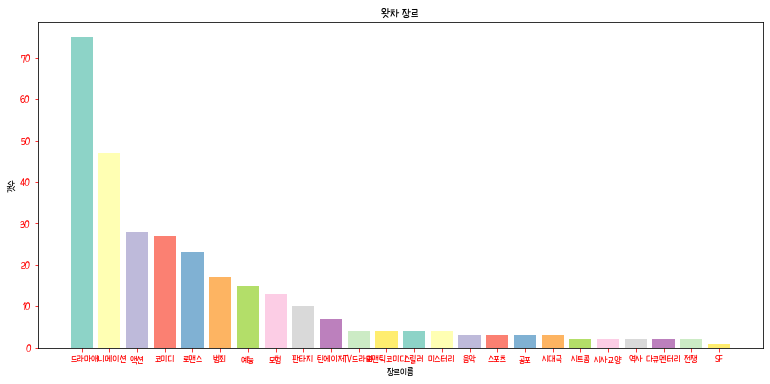

In [49]:
plt.figure(figsize=(13,6))
print(plt.gcf())
s = watchaGR

plt.title("왓차 장르")
plt.ylabel('갯수')
plt.xlabel('장르이름')

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.bar(x=s.index, height=s.왓챠추천장르, color=mycolors)
plt.show()

Figure(1080x720)
AxesSubplot(0.125,0.125;0.775x0.755)


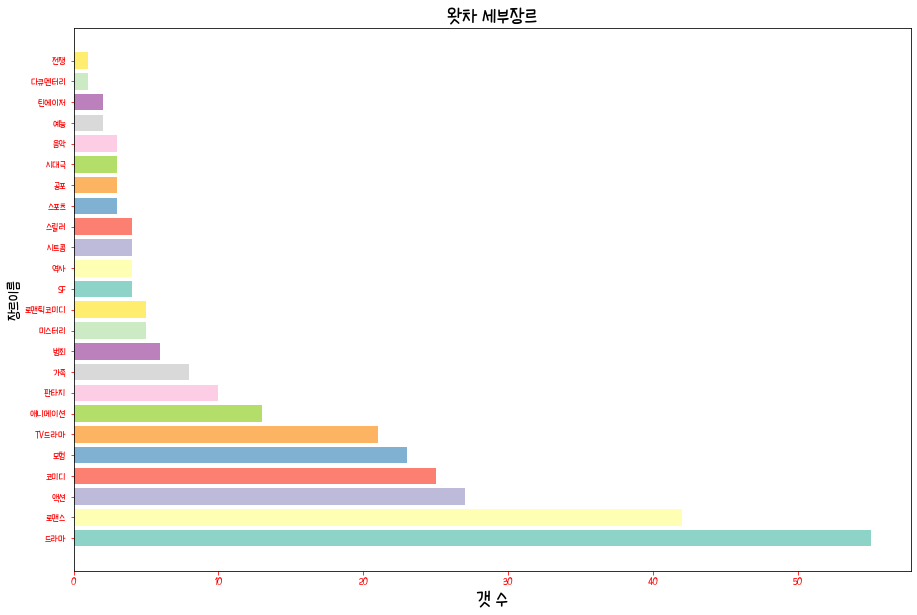

In [64]:
plt.figure(figsize=(15,10))
print(plt.gcf())
s = watchaDGR

plt.title("왓차 세부장르",size=20)
plt.ylabel('장르이름',size=15)
plt.xlabel('갯 수',size=20)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.barh(s.index,s.왓챠추천세부장르, color=mycolors)
#plt.show()
plt.savefig('./output/project/왓차 세부장르.png')

Figure(1080x720)
AxesSubplot(0.125,0.125;0.775x0.755)


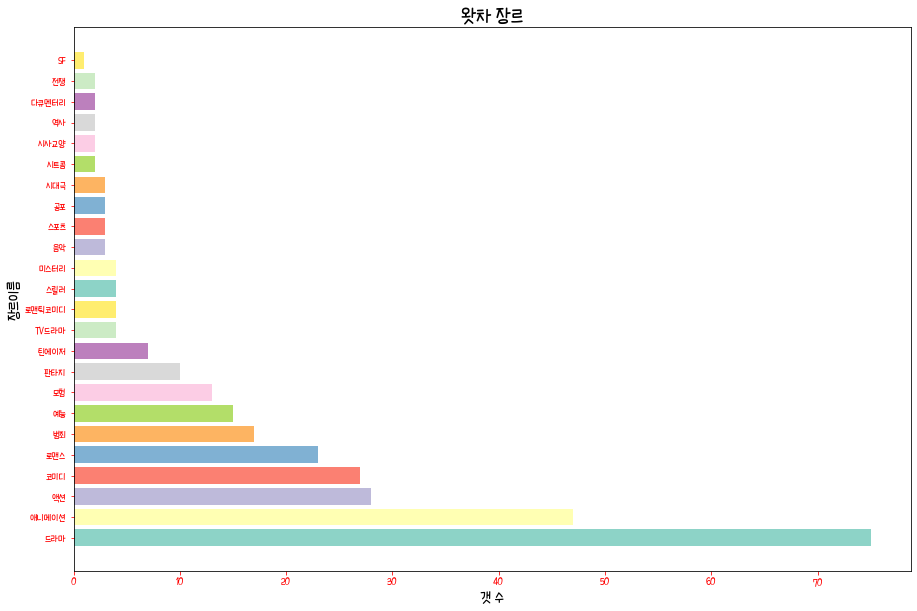

In [65]:
plt.figure(figsize=(15,10))
print(plt.gcf())
s = watchaGR

plt.title("왓차 장르",size=20)
plt.ylabel('장르이름',size=15)
plt.xlabel('갯 수',size=15)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.barh(s.index,s.왓챠추천장르, color=mycolors)
#plt.show()
plt.savefig('./output/project/왓차 장르.png')

In [57]:
watcha=df1.loc[:,["왓챠추천"]]
watcha

,왓챠추천
0,귀멸의 칼날
1,귀멸의 칼날: 무한열차편
2,극장판 귀멸의 칼날: 무한열차편
3,베놈
4,007 카지노 로얄
...,...
296,NaN
297,NaN
298,NaN
299,NaN


In [59]:
df1.head(10)

,Unnamed: 0,왓챠추천,왓챠추천장르
0,0,귀멸의 칼날,애니메이션
1,1,귀멸의 칼날: 무한열차편,애니메이션
2,2,극장판 귀멸의 칼날: 무한열차편,애니메이션
3,3,베놈,액션
4,4,007 카지노 로얄,액션
5,5,007 스펙터,액션
6,6,007 스카이폴,액션
7,7,007 퀀텀 오브 솔러스,액션
8,8,와이 우먼 킬 시즌 2,코미디
9,9,왕좌의 게임 시즌 1,액션


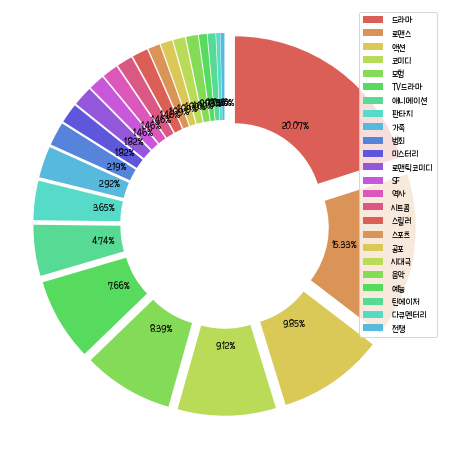

In [66]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(watchaDGR.index)):
    explode.append(0.1)

pie = ax.pie(watchaDGR.왓챠추천세부장르,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )



plt.legend(pie[0],watchaDGR.index) ## 범례 표시
plt.show()

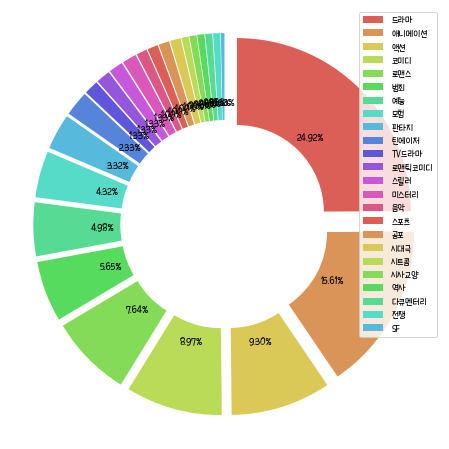

In [73]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(watchaGR.index)):
    explode.append(0.1)

pie = ax.pie(watchaGR.왓챠추천장르,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )



plt.legend(pie[0],watchaGR.index) ## 범례 표시
plt.show()

In [ ]:
watchaGR
percent=[]
for i in range(len(watchaGR.index)):
    percent.append((watchaGR.왓챠추천장르[i]))

In [80]:
watchaGR=watchaGR.rename(columns={'왓챠추천장르':'cnt'})
watchaGR

,cnt
드라마,75
애니메이션,47
액션,28
코미디,27
로맨스,23
범죄,17
예능,15
모험,13
판타지,10
틴에이저,7


In [81]:
cntsum=pd.DataFrame(watchaGR.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(watchaGR.cnt[0]/cntsum.a)*100

watchaGR
a=[]
for i in range(len(watchaGR.index)):
    a.append((watchaGR.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(watchaGR.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

watchaGR1=watchaGR.reset_index()
watchaGR1=pd.concat([watchaGR1,percent],axis=1)
watchaGR1
watchaGR1.set_index('index',inplace=True)

In [83]:
watchaGR1.to_csv('./output/project/왓차장르_퍼센트.csv')

In [87]:
watchaDGR
percent=[]
for i in range(len(watchaDGR.index)):
    percent.append((watchaDGR.왓챠추천세부장르[i]))

In [88]:
watchaDGR=watchaDGR.rename(columns={'왓챠추천세부장르':'cnt'})
watchaDGR

,cnt
드라마,55
로맨스,42
액션,27
코미디,25
모험,23
TV드라마,21
애니메이션,13
판타지,10
가족,8
범죄,6


In [89]:
cntsum=pd.DataFrame(watchaDGR.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(watchaDGR.cnt[0]/cntsum.a)*100

watchaDGR
a=[]
for i in range(len(watchaDGR.index)):
    a.append((watchaDGR.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(watchaDGR.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

watchaDGR1=watchaDGR.reset_index()
watchaDGR1=pd.concat([watchaDGR1,percent],axis=1)
watchaDGR1
watchaDGR1.set_index('index',inplace=True)

In [92]:
watchaDGR1.to_csv('./output/project/왓차세부장르_퍼센트.csv')